# Getting Started with Matplotlib

    Visualizaiton plays a vital role in understanding data
    Matplotlib  and Seaborn is a standard Python package to create graphics



In [ ]:
# Building path to repo, *only need to run once*
! git clone https://github.com/bwsimedlytics/Week1Public

In [1]:
import matplotlib.pyplot  as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import numpy as np
import os

os.chdir("./Week1Public")

## Simple First Graph

Text(0.5, 1.0, 'Plot Points')

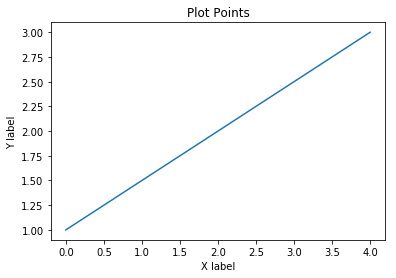

In [2]:
plt.plot([0,1,2,3,4], [1, 1.5, 2, 2.5, 3]) # plot is a versatile method, one recognized argument input is 2 lists representing x and y values
plt.ylabel('Y label')
plt.xlabel('X label')
plt.title('Plot Points')

## Figures and Subplots


    A figure is created via the plt.figure() method. In Figure 1 above we did not explicity code the plt.figure() method and so by default plt.figure(1) ran.


    Multiple graphs can be in one figure with plt.subplot()
    subplot(r,c,fn) is given 3 arguments number of rows, number of columns and figure number


Text(0.5, 1.0, 'Fig Num 2')

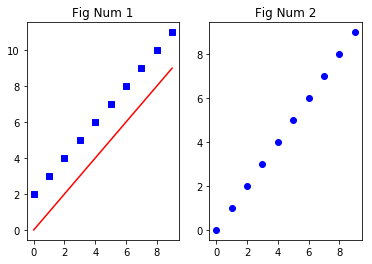

In [3]:
plt.figure(2)  # create new figure
x = np.arange(0,10)  # plot() can take numpy arrays as arguments 
y = np.arange(0, 10)
y2 = np.arange(2, 12) 
              
plt.subplot(1,2,1)  # 1 row, 2 columns, figure number 1

# pass multiple arrays into plot in order to plot on same graph
plt.plot(x, y, 'r-', x, y2, 'bs') # # r:red -:line, b:blue s:square
plt.title("Fig Num 1")


plt.subplot(1,2,2)  # 1 row, 2 columns, figure number 2

plt.plot(x, y, 'bo')  # 'b:blue o:circle'
plt.title("Fig Num 2")


    subplots() is a function that is useful because it returns a figure and axes objects.
    The figure and axes objects can be used to change the graph as desired
    subplots() takes number of rows and number of columns as a parameter


Text(0.5, 1.0, 'ax2')

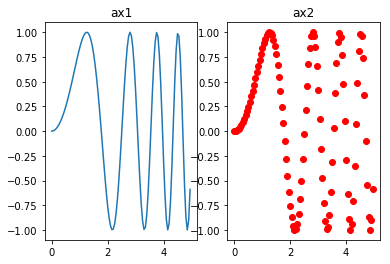

In [4]:
x = np.arange(0,5, .05)
y = np.sin(x ** 2)

f, (ax1, ax2) = plt.subplots(1, 2)  # 1 row, 2 columns
ax1.plot(x, y)
ax1.set_title('ax1')
ax2.plot(x, y, 'ro')
ax2.set_title('ax2')

    References:
    tutorial:  https://matplotlib.org/users/pyplot_tutorial.html 
    api:  https://matplotlib.org/api/pyplot_api.html

In [5]:
import pandas as pd 

In [18]:
data = pd.read_csv("BWSI_Dataset1.csv") # importing data using pandas 
data.head() # view data set

,SubjectID,Year,Sex,Age,Ethnicity,ParentEducation,MaritalStatus,HouseIncome,Protein,Carb,...,Chol,VitA,VitC,Weight,Height,BMI,BloodPres,Diabetes,HealthIns,HoursTV
0,1,6,1,49,3,5,1,11,97.13,253.98,...,180.57,10292.63,112.19,92.5,178.3,29.10,694,2,1,2
1,2,2,1,37,3,4,5,11,130.02,309.57,...,1242.06,4181.03,70.96,99.2,180.0,30.62,1169,2,1,1
2,3,1,1,70,1,1,1,3,67.01,268.23,...,37.41,36792.50,78.51,63.6,157.7,25.57,725,1,1,5
3,4,6,2,38,3,5,3,8,82.66,264.69,...,596.30,3075.79,36.11,81.6,174.9,26.68,697,2,1,3
4,5,2,2,85,4,1,2,1,39.62,112.24,...,124.95,16894.37,69.19,41.5,144.2,19.96,687,2,1,1


Text(0, 0.5, 'Count')

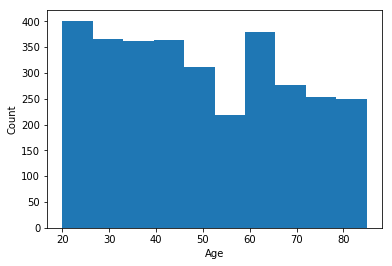

In [7]:
plt.hist(data['Age']) # histogram of age using matplotlib
plt.xlabel('Age') 
plt.ylabel('Count')

Text(0, 0.5, 'Age')

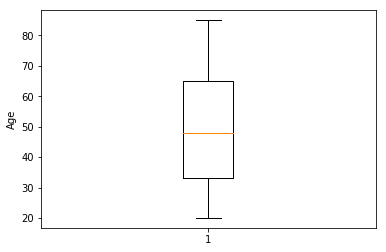

In [8]:
plt.boxplot(data['Age'])  #boxplot of age
plt.ylabel('Age')

Text(0.5, 0, 'Sex')

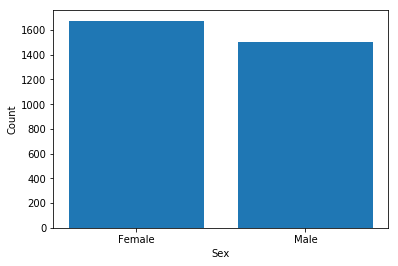

In [9]:
countsex = data['Sex'].value_counts() # frequency of sex using matplotlib
levels = ('Male', 'Female') # labeling categories
levels = [levels[int(x)-1] for x in countsex.index] # correcting indexing
frequency = countsex.values # saves counts of each category

plt.bar(levels, frequency) # creates bar chart
plt.ylabel('Count')
plt.xlabel('Sex')

## Getting Started with Seaborn

In [10]:
import seaborn as sns

Text(0, 0.5, 'Density')

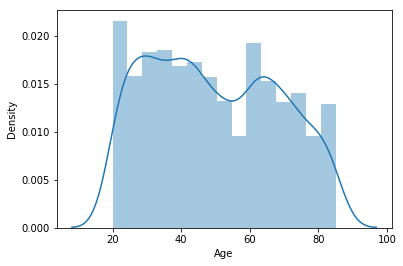

In [11]:
sns.distplot(data['Age'], kde=True) # distribution of age using seaborn
plt.xlabel('Age')
plt.ylabel('Density')


Text(0.5, 0, 'Age')

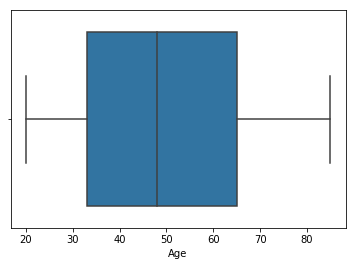

In [12]:
sns.boxplot('Age', data = data) # boxplot of age
plt.xlabel('Age')

Text(0.5, 0, 'Sex')

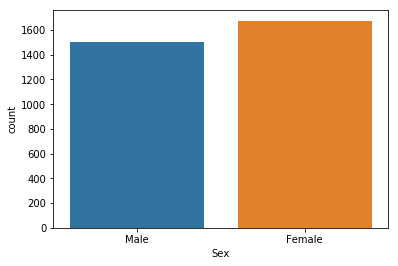

In [13]:
sns.countplot(x = 'Sex', data = data) #frequency of sex using seaborn
plt.xticks(np.arange(2), labels = ('Male', 'Female'), rotation = 0)
plt.xlabel('Sex')

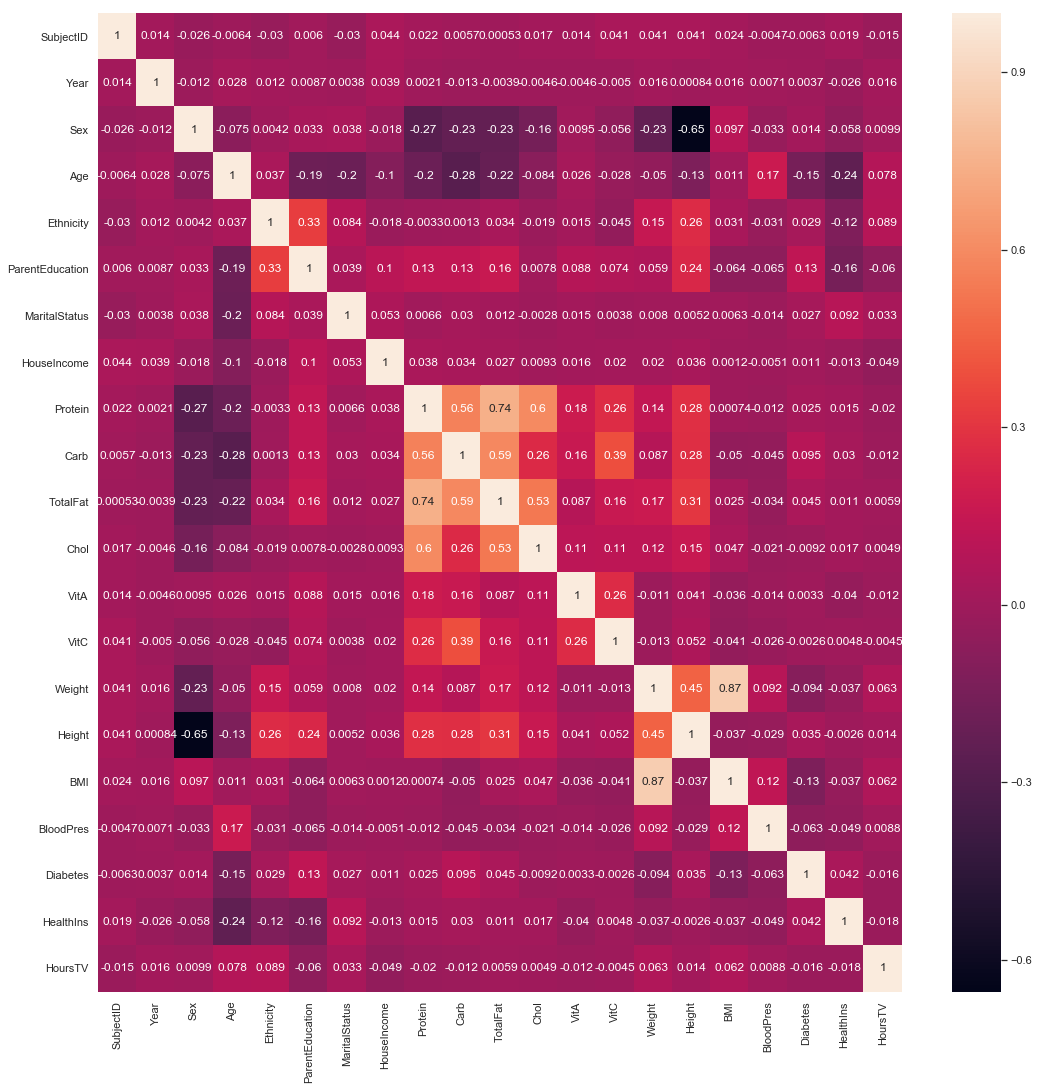

In [14]:
sns.set(rc={'figure.figsize':(18, 18)}) # bigger figures
sns.heatmap(data.corr(), annot = True) # creating a heatmap of all variables in the data set

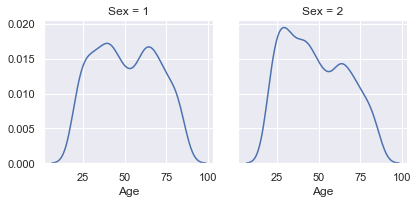

In [15]:
g = sns.FacetGrid(data, col = 'Sex') # facet distribution plots by sex
g = g.map(sns.kdeplot, 'Age')

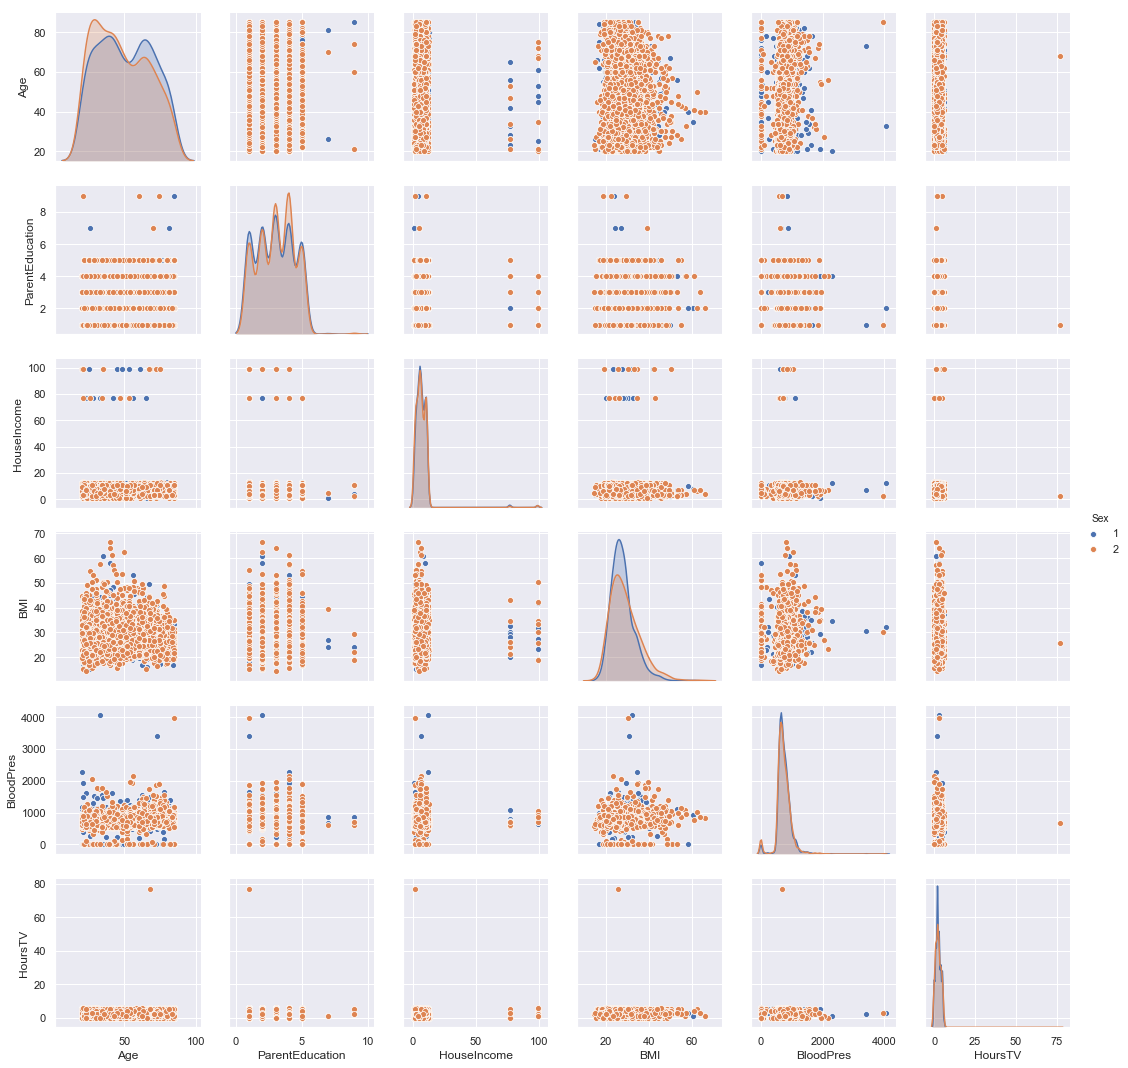

In [16]:
sns.pairplot(data, vars =['Age', 'ParentEducation', 'HouseIncome', 'BMI', 'BloodPres', 'HoursTV'], hue="Sex")
#pairwise plots only for selected variables

In [17]:
plt.savefig("name.png") #saving figures